<a href="https://colab.research.google.com/github/silvia-j-escobar/Amazon-Operational-Strategy-People-Analytics-Externship/blob/main/Learn_How_to_Apply_Text_Cleaning_Steps_in_a_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Learn How to Apply Text Cleaning Steps in a Dataset

The 3 Most Common Issues in Raw Reviews

1. Inconsistent Capitalization

Employee feedback isn’t written for machines, it’s full of capital letters, abbreviations, and sentence case all mixed in. A computer sees “Pay” and “pay” as two different words, even though they mean the same thing.

What to do: Convert everything to lowercase.


In [ ]:
text.lower()

In [ ]:
# Before
"The Pay is fair. But Management is unfair."

In [ ]:
# After
"the pay is fair. but management is unfair."

Now “Pay” becomes “pay” and “Management” becomes “management.” Much simpler for analysis.


2. Punctuation and Extra Symbols

Real-world reviews are full of excitement—exclamation marks, emojis, and extra symbols. These may help humans, but they confuse algorithms.

What to do: Remove punctuation.

In [ ]:
import string
text.translate(str.maketrans('', '', string.punctuation))
#This strips out all punctuation like commas, periods, and exclamation points.

In [ ]:
# Before
"Great team, great perks!!! 😊😊"

In [ ]:
# After
"Great team great perks 😊😊"

NOTE— This won’t remove emojis or special unicode symbols and that’s okay! We’re doing a lightweight cleanup for now.

3. Stopwords and Filler Words

Stopwords are common words like “the,” “is,” and “just” that don’t carry much meaning. Removing them helps surface what really matters.

What to do:
Step 1: Filter out stopwords using NLTK.

In [ ]:
from nltk.corpus import stopwords
stopwords.words('english')

In [ ]:
# Step 2: Remove them
filtered_words = [word for word in tokens if word not in stopwords.words('english')]

In [ ]:
# Before
"The team is the best I’ve worked with."

In [ ]:
# After
"team best ive worked"

Heads-up: You’ll need to run this once if you haven’t already:

In [ ]:
import nltk
nltk.download('stopwords')

Putting It All Together

Instead of doing this manually for every review column, let’s wrap it in a single function.

In [ ]:
import nltk
import string
from nltk.corpus import stopwords
nltk.download('stopwords')

def clean_text(text):
    if pd.isnull(text):
        return ""
    tokens = text.lower().translate(str.maketrans('', '', string.punctuation)).split()
    return ' '.join([word for word in tokens if word not in stopwords.words('english')])

Then use it like this:

In [ ]:
df['cleaned_text'] = df['pros'].apply(clean_text)

You can do the same for 'cons', 'advice', or any other column.

To summarize,

Here’s a quick visual summary of the core steps involved in preparing raw text for analysis:
From normalization to stemming, this is the general flow most text analysis pipelines follow. In this module, you’ve implemented the first few steps (lowercasing, punctuation removal, and stopword filtering). Later, you can expand on this with tokenization or lemmatization if needed.

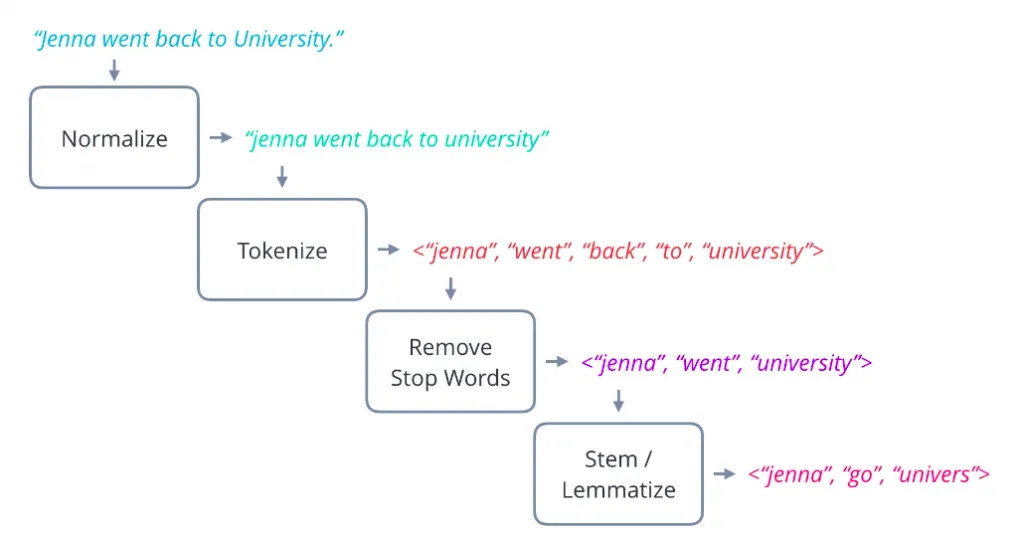